# Step 2: Create a section in your notebook that introduces you (or your group) and introduces your project

## project proposal:
Using Python programming skills, chose one specified grat player to analyze if one of his bad seasons was affected by decreasing the spin rate of his pitching:

1. analyze if spin rate make an influence in players
2. Chose a player to do the analysis


# Step 3: Create a section in your notebook that introduces your data

## project proposal:
my plan is to find why his performance was bad from his career.
So, I think I would include several data visualizations as the below:

1. seaborn to demonstrate's historical performance.
2. boxbar chart to describe he is good, but one year was obviously not so good.
3. scatter chart to illustrate what mechanism made his bad performance
4. (I will figure out)

### locate which players I want

**Extract** data out from (MLB data websit):
https://baseballsavant.mlb.com/statcast_search?hfPT=FF%7CFT%7CFC%7CSI%7CFS%7CSL%7CCH%7CCU%7CKC%7CCS%7CKN%7CFO%7CEP%7CSC%7CIN%7CPO%7CAB%7C&hfAB=&hfGT=R%7C&hfPR=&hfZ=&stadium=&hfBBL=&hfNewZones=&hfPull=&hfC=&hfSea=2021%7C2020%7C2019%7C2018%7C2017%7C&hfSit=&player_type=pitcher&hfOuts=&opponent=&pitcher_throws=&batter_stands=&hfSA=&game_date_gt=&game_date_lt=&hfInfield=&team=&position=&hfOutfield=&hfRO=&home_road=&hfFlag=&hfBBT=&metric_1=&hfInn=&min_pitches=0&min_results=100&group_by=pitch-type&sort_col=spin_rate&player_event_sort=api_p_release_speed&sort_order=desc&min_pas=0#results]

In [175]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('MLB pitchers.csv')
df

,last_name,first_name,player_id,year,p_era,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate
0,Colon,Bartolo,112526.0,2018,5.78,0.301,0.528,0.365,0.329,0.227,89.6,11.8,7.7
1,Belisle,Matt,279571.0,2018,7.86,0.281,0.478,0.356,0.345,0.197,89.3,10.8,7.3
2,Sabathia,CC,282332.0,2018,3.65,0.219,0.351,0.288,0.293,0.132,84.8,13.0,5.2
3,DeLaRosa,Jorge,407822.0,2018,3.38,0.250,0.376,0.319,0.343,0.126,89.7,11.5,4.8
4,Rodney,Fernando,407845.0,2018,3.36,0.236,0.363,0.310,0.330,0.127,87.4,9.8,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,Ryu,JaeKuk,NaN,2006,8.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9045,Hansen,Craig,NaN,2006,6.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9046,Garza,Matt,NaN,2006,5.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9047,Moylan,Peter,NaN,2006,4.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Create** a column to storage players' name

In [176]:
df.insert(2, 'name', df['first_name'] +'_'+ df.last_name)
df

,last_name,first_name,name,player_id,year,p_era,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate
0,Colon,Bartolo,Bartolo_Colon,112526.0,2018,5.78,0.301,0.528,0.365,0.329,0.227,89.6,11.8,7.7
1,Belisle,Matt,Matt_Belisle,279571.0,2018,7.86,0.281,0.478,0.356,0.345,0.197,89.3,10.8,7.3
2,Sabathia,CC,CC_Sabathia,282332.0,2018,3.65,0.219,0.351,0.288,0.293,0.132,84.8,13.0,5.2
3,DeLaRosa,Jorge,Jorge_DeLaRosa,407822.0,2018,3.38,0.250,0.376,0.319,0.343,0.126,89.7,11.5,4.8
4,Rodney,Fernando,Fernando_Rodney,407845.0,2018,3.36,0.236,0.363,0.310,0.330,0.127,87.4,9.8,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,Ryu,JaeKuk,JaeKuk_Ryu,NaN,2006,8.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9045,Hansen,Craig,Craig_Hansen,NaN,2006,6.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9046,Garza,Matt,Matt_Garza,NaN,2006,5.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9047,Moylan,Peter,Peter_Moylan,NaN,2006,4.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
df.sort_values(by=['year'])

,last_name,first_name,name,player_id,year,p_era,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate
9048,Saito,Takashi,Takashi_Saito,NaN,2006,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8683,Franklin,Ryan,Ryan_Franklin,NaN,2006,4.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8684,MacDougal,Mike,Mike_MacDougal,NaN,2006,1.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8685,Weaver,Jeff,Jeff_Weaver,NaN,2006,5.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8686,Snyder,Kyle,Kyle_Snyder,NaN,2006,6.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,PoncedeLeon,Daniel,Daniel_PoncedeLeon,594965.0,2021,6.21,0.234,0.427,0.353,0.371,0.192,89.6,19.1,6.5
3085,Ryan,Kyle,Kyle_Ryan,594986.0,2021,6.75,0.314,0.474,0.368,0.381,0.159,89.8,0.6,8.3
3086,Sadler,Casey,Casey_Sadler,594987.0,2021,0.67,0.198,0.274,0.241,0.258,0.076,85.4,3.5,3.1
3089,Okert,Steven,Steven_Okert,595345.0,2021,2.75,0.173,0.341,0.274,0.283,0.168,86.8,24.9,7.2


In [180]:
filt = (df['year'] == 2016)
 
df.loc[filt]

,last_name,first_name,name,player_id,year,p_era,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate
1084,Colon,Bartolo,Bartolo_Colon,112526.0,2016,3.43,0.273,0.433,0.318,0.306,0.160,90.0,12.2,5.3
1085,Grilli,Jason,Jason_Grilli,276351.0,2016,4.12,0.210,0.375,0.305,0.317,0.166,90.0,17.9,7.4
1086,Benoit,Joaquin,Joaquin_Benoit,276542.0,2016,2.81,0.217,0.339,0.294,0.315,0.122,88.2,15.5,4.7
1087,Belisle,Matt,Matt_Belisle,279571.0,2016,1.76,0.276,0.391,0.299,0.309,0.115,87.8,10.5,2.7
1088,Sabathia,CC,CC_Sabathia,282332.0,2016,3.91,0.222,0.353,0.289,0.298,0.131,85.1,9.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,Hathaway,Steve,Steve_Hathaway,643355.0,2016,4.91,0.241,0.348,0.292,0.311,0.106,84.9,4.7,2.3
1670,Hoffman,Jeff,Jeff_Hoffman,656546.0,2016,4.88,0.281,0.503,0.373,0.370,0.222,89.6,9.0,7.4
1671,Curtis,Zac,Zac_Curtis,657205.0,2016,6.75,0.229,0.358,0.352,0.413,0.129,89.7,16.5,2.4
1672,Mahle,Greg,Greg_Mahle,657670.0,2016,5.40,0.276,0.448,0.356,0.381,0.172,88.2,7.2,8.3


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9049 entries, 0 to 9048
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   last_name           9049 non-null   object 
 1   first_name          9049 non-null   object 
 2   name                9049 non-null   object 
 3   player_id           4154 non-null   float64
 4   year                9049 non-null   int64  
 5   p_era               9049 non-null   float64
 6   xba                 4154 non-null   float64
 7   xslg                4154 non-null   float64
 8   xwoba               4154 non-null   float64
 9   xobp                4154 non-null   float64
 10  xiso                4154 non-null   float64
 11  exit_velocity_avg   4154 non-null   float64
 12  launch_angle_avg    4154 non-null   float64
 13  barrel_batted_rate  4154 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 989.9+ KB


Based on raw data, check players by year who have the longest career (data range: 2006 -2022)

In [302]:
df['name'].value_counts()

Jon_Lester         16
Andrew_Miller      16
Adam_Wainwright    15
Zack_Greinke       15
Ervin_Santana      15
                   ..
Justin_Thomas       1
Robert_Manuel       1
Logan_Gilbert       1
Andy_Oliver         1
Sendy_Rleal         1
Name: name, Length: 2317, dtype: int64

narrow down to players who have >=14 years careers in MLB

In [198]:
df['name'].value_counts()>=14

Jon_Lester          True
Andrew_Miller       True
Adam_Wainwright     True
Zack_Greinke        True
Ervin_Santana       True
                   ...  
Justin_Thomas      False
Robert_Manuel      False
Logan_Gilbert      False
Andy_Oliver        False
Sendy_Rleal        False
Name: name, Length: 2317, dtype: bool

Total 2292 players, only **25** players has >=14 years careers in MLB.

In [206]:
(df['name'].value_counts()>=14).value_counts()

False    2292
True       25
Name: name, dtype: int64

re-arrange data to the top 25 players

In [237]:
filt_value = ['Jon_Lester', 'Andrew_Miller', 'Adam_Wainwright', 'Zack_Greinke', 'Jon_Lester', 
              'Ervin_Santana', 'Anibal_Sanchez', 'Sergio_Romo', 'Justin_Verlander',  
              'Charlie_Morton', 'Johnny_Cueto', 'Joe_Smith', 'Clayton_Kershaw',  
              'Ian_Kennedy', 'Joakim_Soria', 'Zach_Duke', 'Max_Scherzer', 
              'Tyler_Clippard', 'Edwin_Jackson', 'Cole_Hamels', 'CC_Sabathia', 
              'Fernando_Rodney', 'Oliver_Perez', 'J.A._Happ', 'Francisco_Rodriguez', 
              'Felix_Hernandez']
filt = df['name'].isin(filt_value)
df2 = df.loc[filt]
df2

,last_name,first_name,name,player_id,year,p_era,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate
2,Sabathia,CC,CC_Sabathia,282332.0,2018,3.65,0.219,0.351,0.288,0.293,0.132,84.8,13.0,5.2
4,Rodney,Fernando,Fernando_Rodney,407845.0,2018,3.36,0.236,0.363,0.310,0.330,0.127,87.4,9.8,5.6
5,Perez,Oliver,Oliver_Perez,424144.0,2018,1.39,0.172,0.265,0.215,0.234,0.093,86.1,12.9,5.9
7,Wainwright,Adam,Adam_Wainwright,425794.0,2018,4.46,0.232,0.387,0.313,0.320,0.155,85.9,10.1,6.6
8,Greinke,Zack,Zack_Greinke,425844.0,2018,3.21,0.245,0.406,0.303,0.290,0.161,88.0,10.4,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8926,Verlander,Justin,Justin_Verlander,NaN,2006,3.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8943,Sanchez,Anibal,Anibal_Sanchez,NaN,2006,2.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8952,Duke,Zach,Zach_Duke,NaN,2006,4.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9010,Lester,Jon,Jon_Lester,NaN,2006,4.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check players who still in the MLB in **2021**:

only **15** players now still in MLB

In [249]:
filt2 = (df2['year'] == 2021)
df3 = df2.loc[filt2]
df3

,last_name,first_name,name,player_id,year,p_era,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate
2863,Wainwright,Adam,Adam_Wainwright,425794.0,2021,3.05,0.251,0.388,0.302,0.305,0.137,88.2,10.0,6.2
2864,Greinke,Zack,Zack_Greinke,425844.0,2021,4.16,0.266,0.431,0.320,0.307,0.164,88.3,10.6,6.5
2865,Santana,Ervin,Ervin_Santana,429722.0,2021,4.68,0.278,0.533,0.369,0.339,0.255,90.2,13.8,10.9
2876,Morton,Charlie,Charlie_Morton,450203.0,2021,3.34,0.217,0.332,0.282,0.296,0.115,88.1,7.7,4.9
2879,Lester,Jon,Jon_Lester,452657.0,2021,4.71,0.274,0.454,0.344,0.342,0.180,88.3,10.4,7.7
2880,Kennedy,Ian,Ian_Kennedy,453178.0,2021,3.20,0.226,0.428,0.305,0.291,0.202,90.8,26.7,8.8
2881,Miller,Andrew,Andrew_Miller,453192.0,2021,4.75,0.241,0.411,0.333,0.340,0.170,86.3,10.1,8.7
2886,Scherzer,Max,Max_Scherzer,453286.0,2021,2.46,0.196,0.355,0.264,0.249,0.159,87.9,19.3,8.0
2891,Cueto,Johnny,Johnny_Cueto,456501.0,2021,4.08,0.278,0.452,0.339,0.329,0.174,88.4,14.1,6.4
2892,Happ,J.A.,J.A._Happ,457918.0,2021,5.79,0.275,0.503,0.356,0.330,0.228,90.2,16.4,11.6


In [305]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 2863 to 2918
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   last_name           15 non-null     object 
 1   first_name          15 non-null     object 
 2   name                15 non-null     object 
 3   player_id           15 non-null     float64
 4   year                15 non-null     int64  
 5   p_era               15 non-null     float64
 6   xba                 15 non-null     float64
 7   xslg                15 non-null     float64
 8   xwoba               15 non-null     float64
 9   xobp                15 non-null     float64
 10  xiso                15 non-null     float64
 11  exit_velocity_avg   15 non-null     float64
 12  launch_angle_avg    15 non-null     float64
 13  barrel_batted_rate  15 non-null     float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.8+ KB


Check the 15 players who remain in MLB, who is the best: 

**The Ans:** Max_Scherzer

In [269]:
import math 
df3.loc[df3['p_era'] == df3['p_era'].min()]

,last_name,first_name,name,player_id,year,p_era,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate
2886,Scherzer,Max,Max_Scherzer,453286.0,2021,2.46,0.196,0.355,0.264,0.249,0.159,87.9,19.3,8.0


Get the data from Max_Scherzer, draw a bar chart to check his era in all of his pitching careers.

In [190]:
filt = (df['name'] == 'Max_Scherzer')
df.loc[filt]

,last_name,first_name,name,player_id,year,p_era,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate
53,Scherzer,Max,Max_Scherzer,453286.0,2018,2.53,0.186,0.319,0.250,0.246,0.133,86.6,20.7,6.8
636,Scherzer,Max,Max_Scherzer,453286.0,2020,3.74,0.252,0.432,0.322,0.313,0.180,88.5,18.7,8.4
1184,Scherzer,Max,Max_Scherzer,453286.0,2016,2.96,0.197,0.334,0.258,0.254,0.137,87.2,19.4,6.1
1811,Scherzer,Max,Max_Scherzer,453286.0,2015,2.79,0.202,0.340,0.253,0.238,0.137,87.1,17.1,5.8
2343,Scherzer,Max,Max_Scherzer,453286.0,2017,2.51,0.178,0.305,0.244,0.247,0.128,86.5,19.1,5.6
2886,Scherzer,Max,Max_Scherzer,453286.0,2021,2.46,0.196,0.355,0.264,0.249,0.159,87.9,19.3,8.0
3726,Scherzer,Max,Max_Scherzer,NaN,2013,2.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4116,Scherzer,Max,Max_Scherzer,453286.0,2019,2.92,0.203,0.336,0.254,0.250,0.133,87.6,13.5,6.6
4871,Scherzer,Max,Max_Scherzer,NaN,2014,3.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5517,Scherzer,Max,Max_Scherzer,NaN,2011,4.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
df5 = df.loc[df['name'] == 'Max_Scherzer']
df5.sort_values(by=['year'])
df5['p_era'].mean()

3.1999999999999993

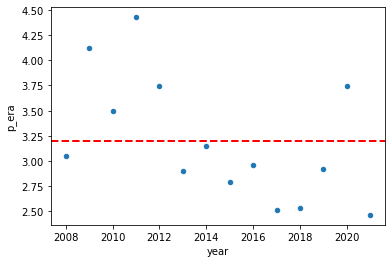

In [283]:
df5.plot(kind='scatter',x='year',y='p_era')
plt.axhline(y=df5['p_era'].mean(), c="r", ls="--", lw=2)

Although he is good now, but when we checked his bar chart, in 2020, his performance was obviously not good from his recent careers

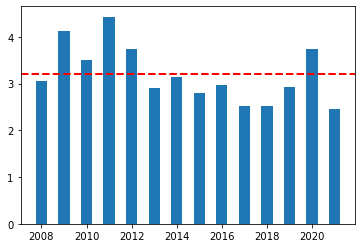

In [296]:
plt.bar(df5.year,
        df5.p_era, 
        width=0.5, 
        bottom=None, 
        align='center',)
plt.axhline(y=df5['p_era'].mean(), c="r", ls="--", lw=2)

The following will focus on Max_Scherzer's 2020 performance, figure out which parameters changed that affected his performance.

In [259]:
filt3_value = ['Adam_Wainwright', 'Zack_Greinke', 'Ervin_Santana', 'Charlie_Morton', 'Jon_Lester', 
              'Ervin_Santana', 'Anibal_Sanchez', 'Sergio_Romo', 'Justin_Verlander',    
              'Ian_Kennedy', 'Andrew_Miller', 'Max_Scherzer', 
              'Johnny_Cueto', 'J.A._Happ', 'Tyler_Clippard', 'Joakim_Soria', 
              'Clayton_Kershaw', 'Sergio_Romo', 'Joe_Smith', ]
filt3 = df['name'].isin(filt3_value)
df4

,last_name,first_name,name,player_id,year,p_era,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate
7,Wainwright,Adam,Adam_Wainwright,425794.0,2018,4.46,0.232,0.387,0.313,0.320,0.155,85.9,10.1,6.6
8,Greinke,Zack,Zack_Greinke,425844.0,2018,3.21,0.245,0.406,0.303,0.290,0.161,88.0,10.4,6.4
10,Santana,Ervin,Ervin_Santana,429722.0,2018,8.03,0.290,0.641,0.419,0.357,0.352,89.2,22.6,13.8
16,Verlander,Justin,Justin_Verlander,434378.0,2018,2.52,0.184,0.309,0.237,0.229,0.125,88.5,22.1,6.2
19,Sanchez,Anibal,Anibal_Sanchez,434671.0,2018,2.83,0.210,0.343,0.275,0.276,0.133,85.0,12.2,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860,Santana,Ervin,Ervin_Santana,NaN,2006,4.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8926,Verlander,Justin,Justin_Verlander,NaN,2006,3.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8943,Sanchez,Anibal,Anibal_Sanchez,NaN,2006,2.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9010,Lester,Jon,Jon_Lester,NaN,2006,4.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


name
Adam_Wainwright     AxesSubplot(0.125,0.125;0.775x0.755)
Andrew_Miller       AxesSubplot(0.125,0.125;0.775x0.755)
Anibal_Sanchez      AxesSubplot(0.125,0.125;0.775x0.755)
Charlie_Morton      AxesSubplot(0.125,0.125;0.775x0.755)
Clayton_Kershaw     AxesSubplot(0.125,0.125;0.775x0.755)
Ervin_Santana       AxesSubplot(0.125,0.125;0.775x0.755)
Ian_Kennedy         AxesSubplot(0.125,0.125;0.775x0.755)
J.A._Happ           AxesSubplot(0.125,0.125;0.775x0.755)
Joakim_Soria        AxesSubplot(0.125,0.125;0.775x0.755)
Joe_Smith           AxesSubplot(0.125,0.125;0.775x0.755)
Johnny_Cueto        AxesSubplot(0.125,0.125;0.775x0.755)
Jon_Lester          AxesSubplot(0.125,0.125;0.775x0.755)
Justin_Verlander    AxesSubplot(0.125,0.125;0.775x0.755)
Max_Scherzer        AxesSubplot(0.125,0.125;0.775x0.755)
Sergio_Romo         AxesSubplot(0.125,0.125;0.775x0.755)
Tyler_Clippard      AxesSubplot(0.125,0.125;0.775x0.755)
Zack_Greinke        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

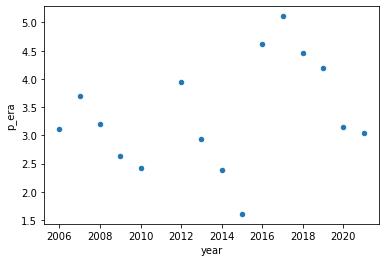

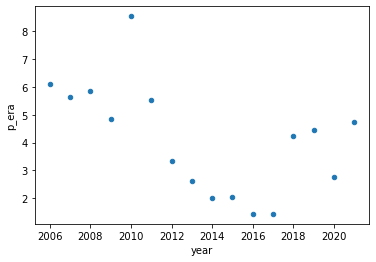

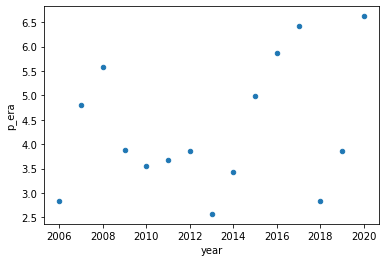

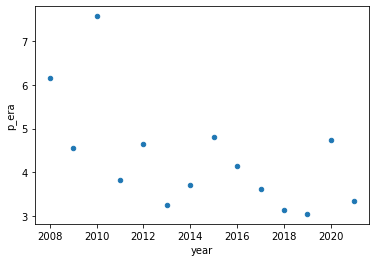

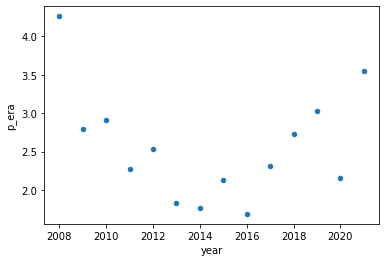

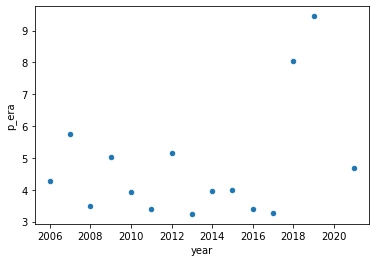

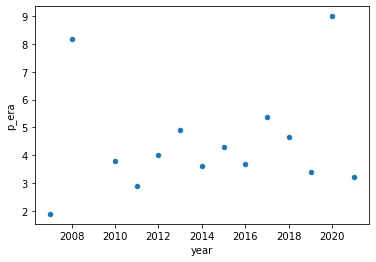

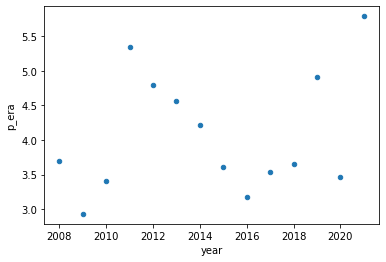

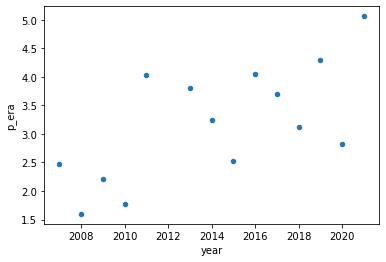

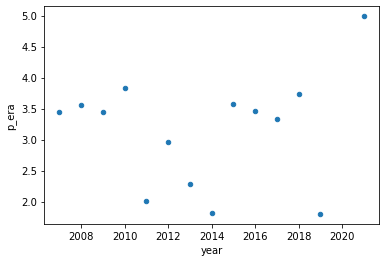

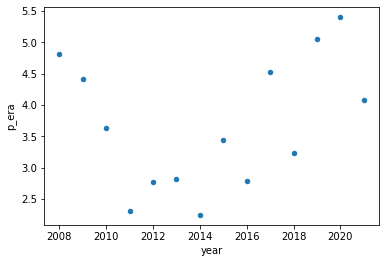

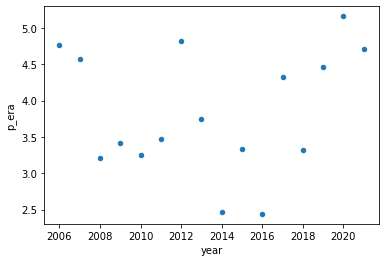

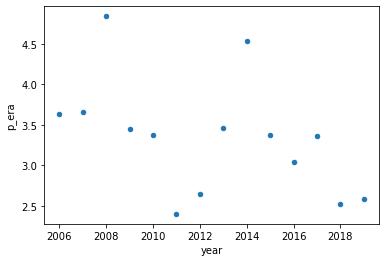

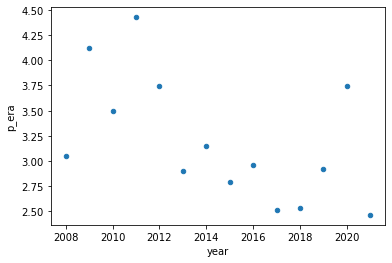

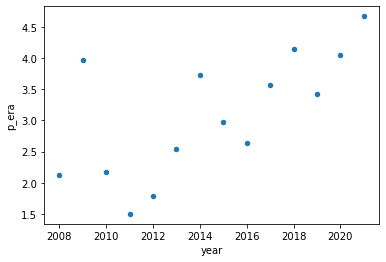

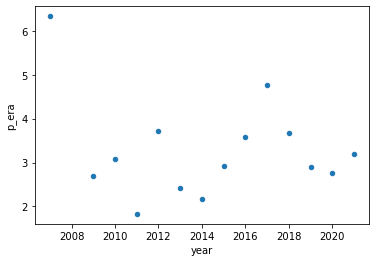

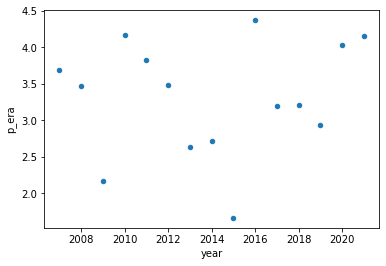

In [257]:
df4.groupby('name').plot(kind='scatter',x='year',y='p_era')

<AxesSubplot:>

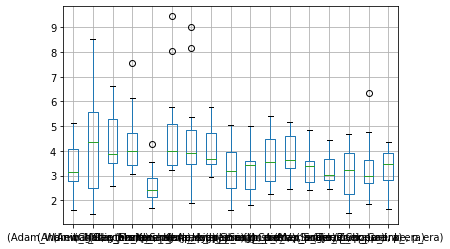

In [258]:
df4.groupby('name').boxplot(column='p_era',subplots=False)

In [43]:
df.isna().sum()

last_name                0
 first_name              0
name                     0
player_id             4895
year                     0
p_era                    0
xba                   4895
xslg                  4895
xwoba                 4895
xobp                  4895
xiso                  4895
exit_velocity_avg     4895
launch_angle_avg      4895
barrel_batted_rate    4895
Unnamed: 13           9049
dtype: int64

In [79]:
df.loc[df['name']=='Max_Scherzer']

,last_name,first_name,name,player_id,year,p_era,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,Unnamed: 13


In [83]:
(df['name'])

0           Bartolo_Colon
1            Matt_Belisle
2             CC_Sabathia
3        Jorge_De La Rosa
4         Fernando_Rodney
              ...        
9044          Jae Kuk_Ryu
9045         Craig_Hansen
9046           Matt_Garza
9047         Peter_Moylan
9048        Takashi_Saito
Name: name, Length: 9049, dtype: object

In [84]:
(df['name']=='Max_Scherzer').value_counts()

False    9049
Name: name, dtype: int64

In [54]:
df.loc[df['year']==2016]

,last_name,first_name,name,player_id,year,p_era,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,Unnamed: 13
1084,Colon,Bartolo,Bartolo Colon,112526.0,2016,3.43,0.273,0.433,0.318,0.306,0.160,90.0,12.2,5.3,NaN
1085,Grilli,Jason,Jason Grilli,276351.0,2016,4.12,0.210,0.375,0.305,0.317,0.166,90.0,17.9,7.4,NaN
1086,Benoit,Joaquin,Joaquin Benoit,276542.0,2016,2.81,0.217,0.339,0.294,0.315,0.122,88.2,15.5,4.7,NaN
1087,Belisle,Matt,Matt Belisle,279571.0,2016,1.76,0.276,0.391,0.299,0.309,0.115,87.8,10.5,2.7,NaN
1088,Sabathia,CC,CC Sabathia,282332.0,2016,3.91,0.222,0.353,0.289,0.298,0.131,85.1,9.7,4.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,Hathaway,Steve,Steve Hathaway,643355.0,2016,4.91,0.241,0.348,0.292,0.311,0.106,84.9,4.7,2.3,NaN
1670,Hoffman,Jeff,Jeff Hoffman,656546.0,2016,4.88,0.281,0.503,0.373,0.370,0.222,89.6,9.0,7.4,NaN
1671,Curtis,Zac,Zac Curtis,657205.0,2016,6.75,0.229,0.358,0.352,0.413,0.129,89.7,16.5,2.4,NaN
1672,Mahle,Greg,Greg Mahle,657670.0,2016,5.40,0.276,0.448,0.356,0.381,0.172,88.2,7.2,8.3,NaN


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9049 entries, 0 to 9048
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   last_name           9049 non-null   object 
 1    first_name         9049 non-null   object 
 2   name                9049 non-null   object 
 3   player_id           4154 non-null   float64
 4   year                9049 non-null   int64  
 5   p_era               9049 non-null   float64
 6   xba                 4154 non-null   float64
 7   xslg                4154 non-null   float64
 8   xwoba               4154 non-null   float64
 9   xobp                4154 non-null   float64
 10  xiso                4154 non-null   float64
 11  exit_velocity_avg   4154 non-null   float64
 12  launch_angle_avg    4154 non-null   float64
 13  barrel_batted_rate  4154 non-null   float64
 14  Unnamed: 13         0 non-null      float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.0+ 

In [57]:
(df['year']==2016).value_counts()

False    8459
True      590
Name: year, dtype: int64

In [58]:
(df['name']=='Steve Hathaway').value_counts()

False    9049
Name: name, dtype: int64

In [70]:
df2 = df.drop('name', axis=1)
df2

,last_name,first_name,player_id,year,p_era,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,Unnamed: 13
0,Colon,Bartolo,112526.0,2018,5.78,0.301,0.528,0.365,0.329,0.227,89.6,11.8,7.7,NaN
1,Belisle,Matt,279571.0,2018,7.86,0.281,0.478,0.356,0.345,0.197,89.3,10.8,7.3,NaN
2,Sabathia,CC,282332.0,2018,3.65,0.219,0.351,0.288,0.293,0.132,84.8,13.0,5.2,NaN
3,De La Rosa,Jorge,407822.0,2018,3.38,0.250,0.376,0.319,0.343,0.126,89.7,11.5,4.8,NaN
4,Rodney,Fernando,407845.0,2018,3.36,0.236,0.363,0.310,0.330,0.127,87.4,9.8,5.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,Ryu,Jae Kuk,NaN,2006,8.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9045,Hansen,Craig,NaN,2006,6.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9046,Garza,Matt,NaN,2006,5.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9047,Moylan,Peter,NaN,2006,4.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
